In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:

conn = sqlite3.connect('telkom.db')

In [3]:
c = conn.cursor()

## Desain Database
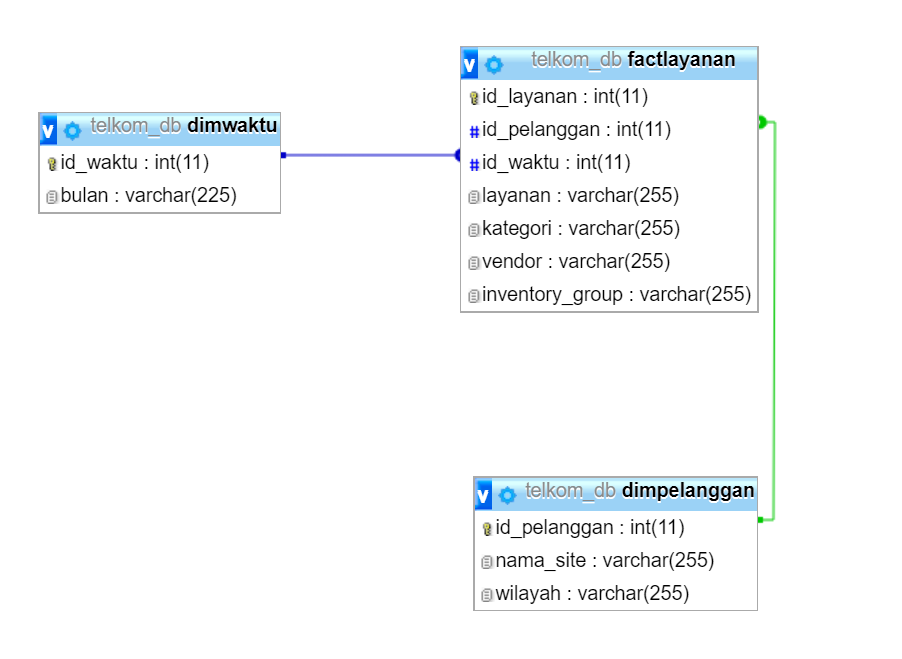

In [4]:
c.executescript('drop table if exists waktu')
c.executescript('drop table if exists pelanggan')
c.executescript('drop table if exists layanan')
c.execute("CREATE TABLE IF NOT EXISTS 'waktu' ('id' INT, 'bulan' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'pelanggan' ('id' INT, 'nama_site' VARCHAR(255) NULL, 'wilayah' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'layanan' ( 'id', 'layanan' VARCHAR(255) NULL, 'kategori' VARCHAR(255) NULL, 'vendor' VARCHAR(255) NULL, 'inventory_group' VARCHAR(255) NULL,'pelanggan_id' INT NOT NULL,'waktu_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('pelanggan_id') REFERENCES 'pelanggan' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('waktu_id') REFERENCES 'waktu' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")


In [5]:
li = pd.read_csv("dataset.csv")
li

,NOMOR,NAMA_SITE,VENDOR,Bulan,WILAYAH,PROGRAM,NAMA_LAYANAN,KATEGORI,INVENTORY_GROUP
0,1,HOTSPOT WARKOP KAPUR (M KAYYIS ATMADJI),CISCO,JANUARI,SURABAYA SELATAN,OTHER,CONS,WMS,Silver
1,2,HOTSPOT HOMESTAY SISWO AGUSTIAR,CISCO,JANUARI,SURABAYA SELATAN,OTHER,CONS,WMS,Silver
2,3,WMS semboja corner / DEWI ARIATI,CISCO,JANUARI,MALANG,OTHER,CONS,WMS,Silver
3,4,WMS-BAROKALLAH / NURUL FARIDAYATI,CISCO,JANUARI,SIDOARJO,OTHER,CONS,WMS,Silver
4,5,Noname Site Location,CISCO,JANUARI,MALANG,OTHER,DWS,BASIC,OTHER
...,...,...,...,...,...,...,...,...,...
3146,3147,Noname Site Location,PINS,DESEMBER,SURABAYA UTARA,OTHER,EBIS,BASIC,OTHER
3147,3148,Noname Site Location,PINS,DESEMBER,MADIUN,OTHER,EBIS,BASIC,OTHER
3148,3149,Noname Site Location,PINS,DESEMBER,SURABAYA SELATAN,OTHER,EBIS,BASIC,OTHER
3149,3150,Noname Site Location,PINS,DESEMBER,MADURA,OTHER,EBIS,BASIC,OTHER


## Proses ETL

In [6]:
waktu = []
pelanggan = []

for i,j in li.iterrows():
    if j[3] not in waktu:
        waktu.append(j[3])
        
            
    if [j[1], j[4]] not in pelanggan:
        pelanggan.append([j[1], j[4]])


layanan = []
for i,j in li.iterrows():   
    
    t = -1
    for index, value in enumerate(waktu):
        if value == j[3]:
            t = index+1
            break
            
    b = -1
    for index, value in enumerate(pelanggan):
        if value[0] == j[1]:
            b = index+1
            break
        
    if [j[6], j[7], j[2], j[8], b, t] not in layanan:
        layanan.append([j[6], j[7], j[2], j[8], b, t])

In [7]:

c.execute("DELETE FROM WAKTU")
for index, i in enumerate(waktu): 
    c.execute("INSERT INTO WAKTU VALUES("+str(index+1)+",'"+str(i)+"')")

c.execute("DELETE FROM PELANGGAN")
for index, i in enumerate(pelanggan):
    c.execute("INSERT INTO PELANGGAN VALUES("+str(index+1)+",'"+str(i[0])+"','"+str(i[1])+"')") 
    
# c.execute("DELETE FROM PELANGGAN")
# for index, i in enumerate(pelanggan):
#     wilayah_id = i[2]
#     alamat = i[1]
#     nama_site = i[0]
#     c.execute("INSERT INTO PELANGGAN VALUES("+ str(index+1) +",?,?,?)", (nama_site, alamat, wilayah_id,))
    
c.execute("DELETE FROM LAYANAN")
for index, i in enumerate(layanan):    
    pelanggan_id = i[4]    
    waktu_id = i[5]
    c.execute("INSERT INTO LAYANAN VALUES("+str(index+1)+",'"+str(i[0])+"','"+ str(i[1])+"','"+str(i[2])+"','"+str(i[3])+"',"+str(pelanggan_id)+","+str(waktu_id)+")")

    
conn.commit()

In [8]:
c.execute('''SELECT * FROM LAYANAN''')

LAYANAN = []
for row in c.fetchall():
    LAYANAN.append(row)
print("========================LAYANAN===========================")
print(LAYANAN)
print("============================================================")

========================LAYANAN===========================
[(1, 'CONS', 'WMS', 'CISCO', 'Silver', 1, 1), (2, 'CONS', 'WMS', 'CISCO', 'Silver', 2, 1), (3, 'CONS', 'WMS', 'CISCO', 'Silver', 3, 1), (4, 'CONS', 'WMS', 'CISCO', 'Silver', 4, 1), (5, 'DWS', 'BASIC', 'CISCO', 'OTHER', 5, 1), (6, 'CONS', 'WMS', 'CISCO', 'Silver', 6, 1), (7, 'CONS', 'WMS', 'CISCO', 'Silver', 8, 1), (8, 'CONS', 'WMS', 'CISCO', 'Silver', 9, 1), (9, 'CONS', 'WMS', 'CISCO', 'Silver', 10, 1), (10, 'CONS', 'WMS', 'CISCO', 'Silver', 11, 1), (11, 'CONS', 'WMS', 'CISCO', 'Silver', 12, 1), (12, 'CONS', 'WMS', 'CISCO', 'Silver', 13, 1), (13, 'CONS', 'WMS', 'CISCO', 'Silver', 14, 1), (14, 'CONS', 'WMS', 'CISCO', 'Silver', 15, 1), (15, 'CONS', 'WMS', 'CISCO', 'Silver', 16, 1), (16, 'CONS', 'WMS', 'CISCO', 'Silver', 17, 1), (17, 'CONS', 'WMS', 'CISCO', 'Silver', 18, 1), (18, 'CONS', 'WMS', 'CISCO', 'Silver', 20, 1), (19, 'CONS', 'WMS', 'CISCO', 'Silver', 21, 1), (20, 'CONS', 'WMS', 'CISCO', 'Silver', 22, 1), (21, 'CONS', 'WMS

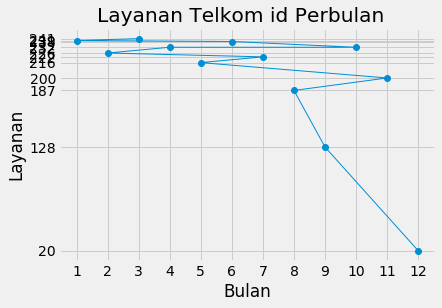

,Bulan,Jumlah Layanan
1,3,241
2,1,239
3,6,238
4,10,232
5,4,232
6,2,226
7,7,222
8,5,216
9,11,200
10,8,187


In [9]:
#VISUALISASI DATA JUMLAH LAYANAN PADA SETIAP BULAN

c.execute('''select * from(select waktu_id, count(layanan) as jumlah_layanan from layanan group by waktu_id order by jumlah_layanan desc)''')
 
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_layanan = np.array(jumlah)

plt.plot([int (x[0]) for x in np_layanan [:,:]], [ int(x[1]) for x in np_layanan[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_layanan[:,:]], [ int(x[0]) for x in np_layanan[:,:]])
plt.yticks([ int(x[1]) for x in np_layanan[:,:]], [ int(x[1]) for x in np_layanan[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Layanan')
plt.title("Layanan Telkom id Perbulan  ")
plt.show()

df = pd.DataFrame([ x for x in np_layanan[:,:]])
df.columns = ['Bulan', 'Jumlah Layanan']
df.index = np.arange(1,len(df)+1)
df

In [10]:
layanan = li['NAMA_LAYANAN'].value_counts().reset_index()
layanan.columns = ['Layanan', 'Total']
layanan

,Layanan,Total
0,CONS,2865
1,DWS,204
2,EBIS,82


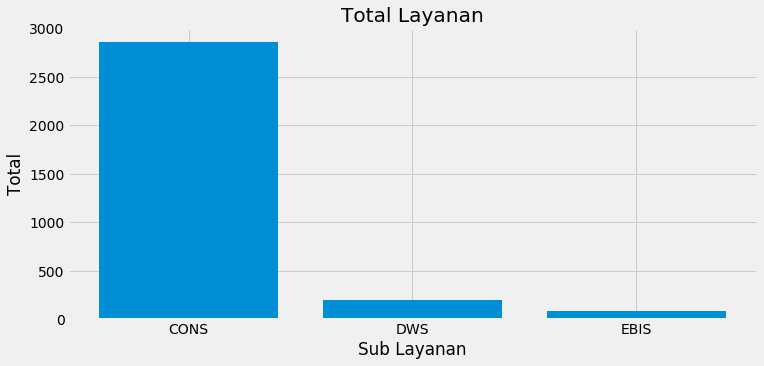

In [11]:
plt.figure(figsize=(11,5))
plt.bar(layanan['Layanan'], layanan['Total'])
plt.title('Total Layanan')
plt.xlabel('Sub Layanan')
plt.ylabel('Total')
plt.show()

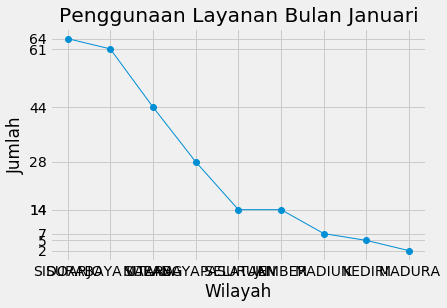

,Wilayah,Jumlah
1,SIDOARJO,64
2,SURABAYA UTARA,61
3,MALANG,44
4,SURABAYA SELATAN,28
5,PASURUAN,14
6,JEMBER,14
7,MADIUN,7
8,KEDIRI,5
9,MADURA,2


In [12]:
#VISUALISASI DATA KOTA DAN JUMLAH LAYANAN PADA BULAN JANUARI
c.execute('''select pelanggan.wilayah, count(layanan.pelanggan_id) as jumlah
        from waktu join layanan on waktu.id = layanan.waktu_id
        join pelanggan on pelanggan.id = layanan.pelanggan_id
        where waktu.bulan = 'JANUARI'
        group by pelanggan.wilayah order by jumlah desc''')
 
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_tahun = np.array(jumlah)

plt.plot([ str(x[0]) for x in np_tahun [:,:]], [ int(x[1]) for x in np_tahun[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_tahun[:,:]], [ str(x[0]) for x in np_tahun[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun[:,:]], [ int(x[1]) for x in np_tahun[:,:]])
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title("Penggunaan Layanan Bulan Januari")
plt.show()

df = pd.DataFrame([ x for x in np_tahun[:,:]])
df.columns = ['Wilayah', 'Jumlah']
df.index = np.arange(1,len(df)+1)
df

In [13]:
inventory_group = li['INVENTORY_GROUP'].value_counts().reset_index()
inventory_group.columns = ['Group', 'Total']
inventory_group

,Group,Total
0,Silver,2272
1,OTHER,764
2,Gold,59
3,WIFI CORNER 2.0,40
4,Platinum,15
5,Flexible - Voucher,1


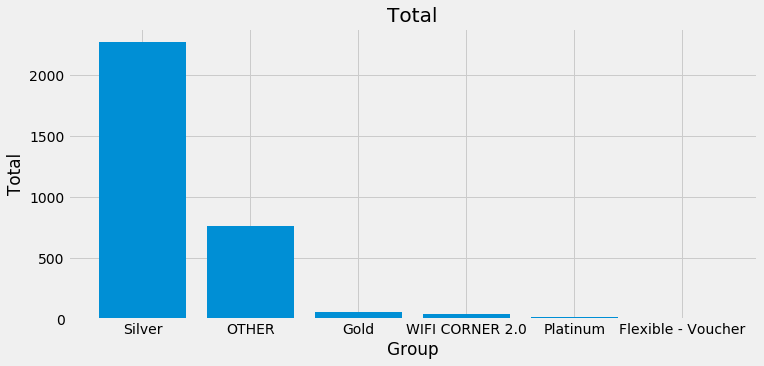

In [14]:
plt.figure(figsize=(11,5))
plt.bar(inventory_group['Group'], inventory_group['Total'])
plt.title('Total')
plt.xlabel('Group')
plt.ylabel('Total')
plt.show()

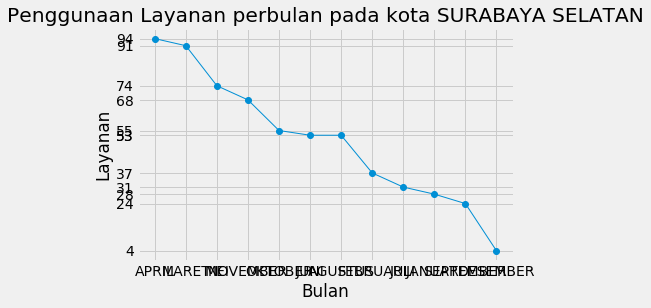

,Bulan,Layanan
1,APRIL,94
2,MARET,91
3,MEI,74
4,NOVEMBER,68
5,OKTOBER,55
6,JUNI,53
7,AGUSTUS,53
8,FEBRUARI,37
9,JULI,31
10,JANUARI,28


In [15]:
#VISUALISASI DATA KOTA SURABAYA SELATAN DAN JUMLAH LAYANAN PADA PERBULAN
c.execute('''select waktu.bulan, count(layanan) as jumlah
        from waktu join layanan on waktu.id = layanan.waktu_id
        join pelanggan on pelanggan.id = layanan.pelanggan_id
        where pelanggan.wilayah = 'SURABAYA SELATAN'
        group by waktu.bulan order by jumlah desc''')
 
banyak = []
for row in c.fetchall():
    banyak.append(row)
np_tahun = np.array(banyak)

plt.plot([str(x[0]) for x in np_tahun [:,:]], [ int(x[1]) for x in np_tahun[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_tahun[:,:]], [ str(x[0]) for x in np_tahun[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun[:,:]], [ int(x[1]) for x in np_tahun[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Layanan')
plt.title("Penggunaan Layanan perbulan pada kota SURABAYA SELATAN")
plt.show()

df = pd.DataFrame([ x for x in np_tahun[:,:]])
df.columns = ['Bulan', 'Layanan']
df.index = np.arange(1,len(df)+1)
df

In [17]:
# # .index = np.arange(1,len(df)+1)
# df